In [24]:
import os

from utils import load_jsonl_iteratively

result_root = "/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/"
model_name = "exp2-multi"
lang = "en_jstage"

def collect_loss_data(sequence_type, distortion):
    """Collect loss data for a given sequence_type and distortion"""
    result_dir = os.path.join(result_root, f"{lang}_{sequence_type}_{distortion}", f"llm-jp-3-13b-{model_name}")
    
    iterations = []
    avg_losses = []
    noisy_rates = []
    for filename in sorted(os.listdir(result_dir)):
        iteration = int(filename[5:-6])
        if 0 < iteration < 500:
            continue
        
        avg_loss = 0
        filepath = os.path.join(result_dir, filename)
        
        cnt = 0
        noisy_token_cnt, all_token_cnt = 0, 0
        for item in load_jsonl_iteratively(filepath):
            avg_loss += item['avg_loss']
            noisy_token_cnt += sum(1 for label in item['metadata']['token_labels'] if label != '<token>')
            all_token_cnt += len(item['metadata']['token_labels'])
            cnt += 1
        
        iterations.append(iteration)
        avg_losses.append(avg_loss / cnt if cnt > 0 else -1)
        noisy_rates.append(noisy_token_cnt / all_token_cnt)
    if len(avg_losses) > 0:
        assert len(set(noisy_rates)) == 1, "Noisy rates should be the same for all iterations, but got {}".format(noisy_rates)
    return iterations, avg_losses, noisy_rates[0]

In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_loss_curves_by_sequence(sequence_types, noisy_rate=None, show_noise_rate=False):
    """Plot multiple loss curves with sequence_type as parameters"""
    
    plt.figure(figsize=(6, 4))
    
    # Color palette for different sequence types
    colors = plt.cm.tab10(np.linspace(0, 1, len(sequence_types)))
    
    for i, sequence_type in enumerate(sequence_types):
        try:
            iterations, avg_losses, noisy_rate = collect_loss_data(sequence_type, "original")
            _noisy_rate = noisy_rate if noisy_rate is not None else _noisy_rate
            label = f'{sequence_type} ({_noisy_rate:.0%})' if show_noise_rate else f'{sequence_type}'

            plt.plot(iterations, avg_losses,
                    label=label,
                    color=colors[i],
                    marker='o', 
                    markersize=4,
                    linewidth=2,
                    alpha=0.8)
            min_idx = np.argmin(avg_losses)
            min_x = iterations[min_idx]
            min_y = avg_losses[min_idx]
            plt.plot(min_x, min_y,
                        marker='^',
                        color=colors[i],
                        markersize=6)

            print(f"✓ Plotted {sequence_type}: {len(iterations)} data points")
        
        except Exception as e:
            print(f"⚠️  Error plotting {sequence_type}: {str(e)}")
            continue
    
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Average Loss', fontsize=12)
    plt.title(f'Loss Curves by Sequence Type (Distortion: original)', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()

def plot_multiple_loss_curves_by_distortion(distortions, noisy_rate=None, show_noise_rate=False):
    """Plot multiple loss curves with distortion as parameters"""
    
    
    plt.figure(figsize=(6, 4))
    
    # Color palette for different distortions
    colors = plt.cm.tab10(np.linspace(0, 1, len(distortions)))

    for i, distortion in enumerate(distortions):
        try:
            iterations, avg_losses, _noisy_rate = collect_loss_data("full", distortion)
            _noisy_rate = noisy_rate if noisy_rate is not None else _noisy_rate
            label = f'{distortion} ({_noisy_rate:.0%})' if show_noise_rate else f'{distortion}'
            plt.plot(iterations, avg_losses,
                    label=label, 
                    color=colors[i],
                    marker='.', 
                    markersize=4,
                    linewidth=2,
                    alpha=0.9)
            min_idx = np.argmin(avg_losses)
            min_x = iterations[min_idx]
            min_y = avg_losses[min_idx]
            plt.plot(min_x, min_y,
                        marker='^',
                        color=colors[i],
                        markersize=6)

            print(f"✓ Plotted {distortion}: {len(iterations)} data points")
        except Exception as e:
            print(f"⚠️  Error plotting {distortion}: {str(e)}")
            continue
    
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Average Loss', fontsize=12)
    plt.title(f'Loss Curves by Distortion (Noisy pattern: {distortion})', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()

✓ Plotted full: 16 data points
✓ Plotted partial-12: 16 data points
✓ Plotted partial-23: 16 data points
✓ Plotted partial-34: 16 data points
✓ Plotted partial-13: 16 data points
✓ Plotted partial-24: 16 data points


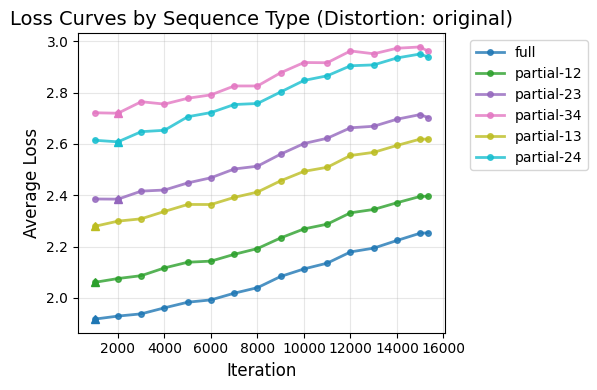

In [26]:
sequence_types = ["full", "partial-12", "partial-23", "partial-34", "partial-13", "partial-24"]
fig = plot_multiple_loss_curves_by_sequence(sequence_types, show_noise_rate=False)
plt.show()
    

✓ Plotted original: 16 data points
✓ Plotted mask-2: 16 data points
✓ Plotted mask-4: 16 data points
✓ Plotted mask-8: 16 data points
✓ Plotted mask-16: 16 data points
✓ Plotted mask-32: 16 data points


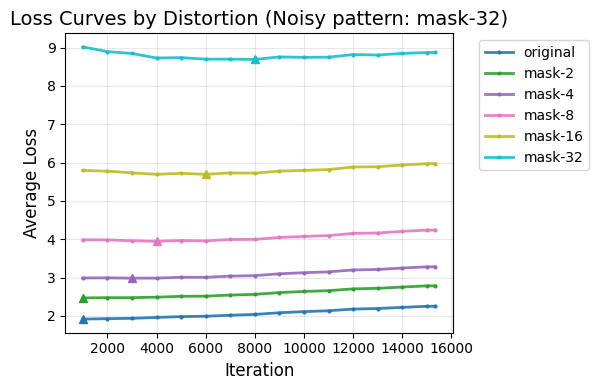

In [27]:
distortions = ["original", "mask-2", "mask-4", "mask-8", "mask-16", "mask-32"]
fig = plot_multiple_loss_curves_by_distortion(distortions, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted delete-2: 16 data points
✓ Plotted delete-4: 16 data points
✓ Plotted delete-8: 16 data points
✓ Plotted delete-16: 16 data points
✓ Plotted delete-32: 16 data points


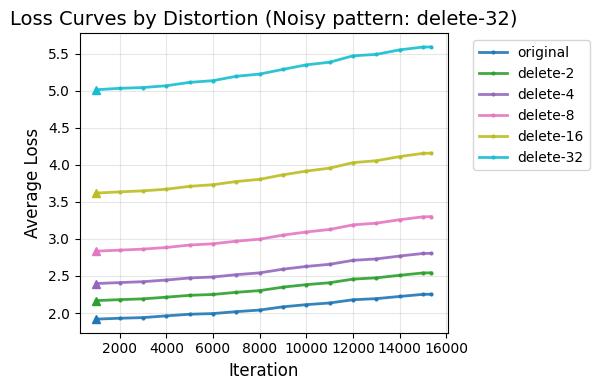

In [28]:
distortions = ["original", "delete-2", "delete-4", "delete-8", "delete-16", "delete-32"]
fig = plot_multiple_loss_curves_by_distortion(distortions, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted replace-2: 16 data points
✓ Plotted replace-4: 16 data points
✓ Plotted replace-8: 16 data points
✓ Plotted replace-16: 16 data points
✓ Plotted replace-32: 16 data points


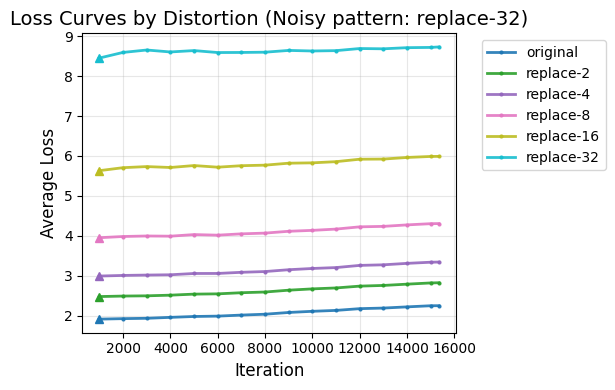

In [29]:
distortions = ["original", "replace-2", "replace-4", "replace-8", "replace-16", "replace-32"]
fig = plot_multiple_loss_curves_by_distortion(distortions)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted mask-8: 16 data points
✓ Plotted delete-8: 16 data points
✓ Plotted replace-8: 16 data points


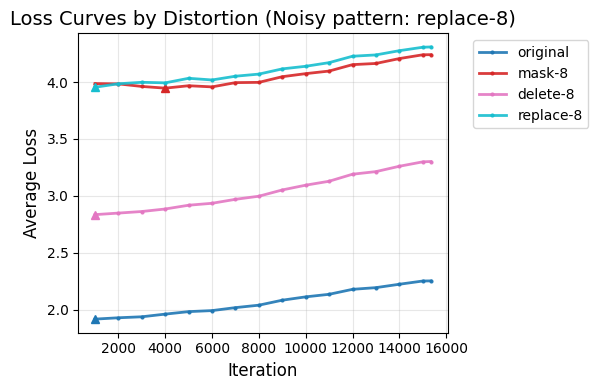

In [30]:
distortions = ["original", "mask-8", "delete-8", "replace-8"]
fig = plot_multiple_loss_curves_by_distortion(distortions)
plt.show()

✓ Plotted original: 16 data points
⚠️  Error plotting resent-2: list index out of range
✓ Plotted resent-3: 16 data points
✓ Plotted resent-4: 16 data points


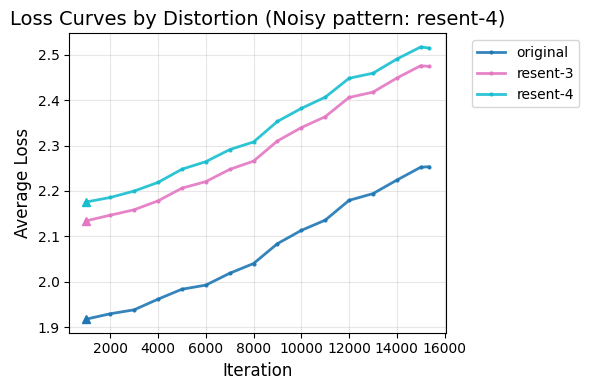

In [31]:
distortions = ["original", "resent-2", "resent-3", "resent-4"]
fig = plot_multiple_loss_curves_by_distortion(distortions)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted retoken-2@3: 16 data points
✓ Plotted retoken-4@3: 16 data points
✓ Plotted retoken-8@3: 16 data points
✓ Plotted retoken-16@3: 16 data points
✓ Plotted retoken-32@3: 16 data points


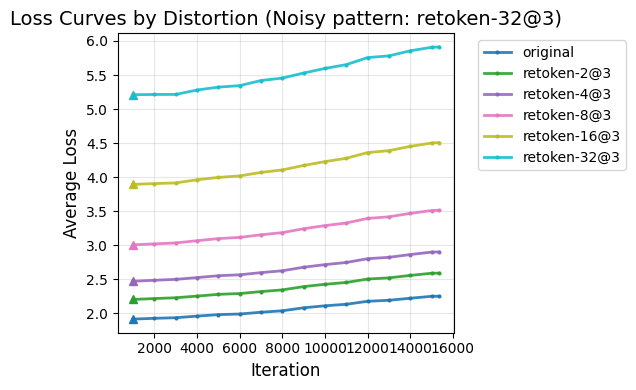

In [32]:
distortions = ["original", "retoken-2@3", "retoken-4@3", "retoken-8@3", "retoken-16@3", "retoken-32@3"]
fig = plot_multiple_loss_curves_by_distortion(distortions)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted retoken-4@1: 16 data points
✓ Plotted retoken-4@2: 16 data points
✓ Plotted retoken-4@4: 16 data points
✓ Plotted retoken-4@8: 16 data points
✓ Plotted retoken-4@16: 16 data points


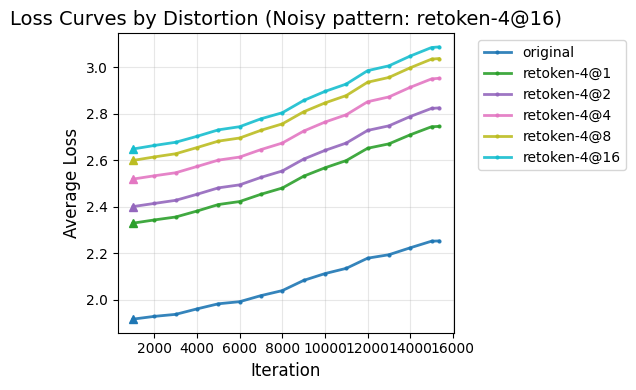

In [33]:
distortions = ["original", "retoken-4@1", "retoken-4@2", "retoken-4@4", "retoken-4@8", "retoken-4@16"]
fig = plot_multiple_loss_curves_by_distortion(distortions)
plt.show()

✓ Plotted original: 16 data points
⚠️  Error plotting monosyn-8: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_monosyn-8/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting monosyn-16: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_monosyn-16/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting monosyn-32: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_monosyn-32/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting monosyn-64: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_monosyn-64/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting monosyn-100: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_monosyn-100/llm-jp-3-13b-exp2-multi'


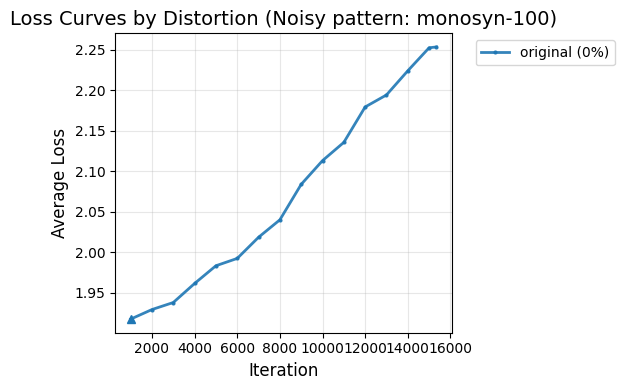

In [34]:
distortions = ["original", "monosyn-8", "monosyn-16", "monosyn-32", "monosyn-64", "monosyn-100"]
fig = plot_multiple_loss_curves_by_distortion(distortions, show_noise_rate=True)
plt.show()

✓ Plotted original: 16 data points
⚠️  Error plotting mltlsyn-8: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_mltlsyn-8/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting mltlsyn-16: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_mltlsyn-16/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting mltlsyn-32: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_mltlsyn-32/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting mltlsyn-64: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_mltlsyn-64/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting mltlsyn-100: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_mltlsyn-100/llm-jp-3-13b-exp2-multi'


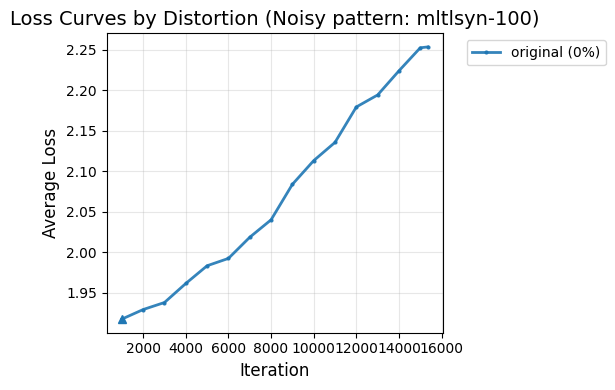

In [35]:
distortions = ["original", "mltlsyn-8", "mltlsyn-16", "mltlsyn-32", "mltlsyn-64", "mltlsyn-100"]
fig = plot_multiple_loss_curves_by_distortion(distortions, show_noise_rate=True)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted rewrite@syntax-20: 16 data points
✓ Plotted rewrite@syntax-40: 16 data points
✓ Plotted rewrite@syntax-60: 16 data points
✓ Plotted rewrite@syntax-80: 16 data points
✓ Plotted rewrite@syntax-100: 16 data points


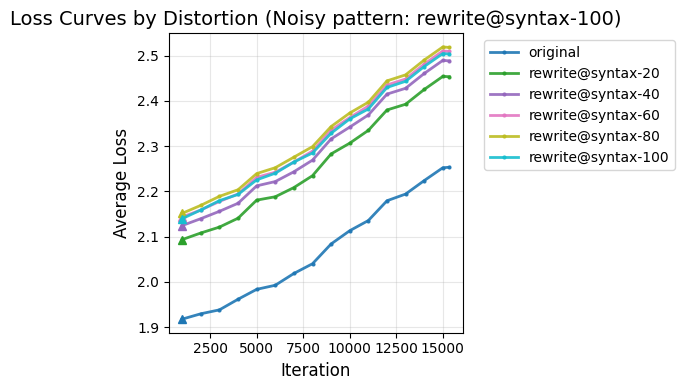

In [36]:
sequence_types = ["original", "rewrite@syntax-20", "rewrite@syntax-40", "rewrite@syntax-60", "rewrite@syntax-80", "rewrite@syntax-100"]
fig = plot_multiple_loss_curves_by_distortion(sequence_types, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted rewrite@lexicon-20: 16 data points
✓ Plotted rewrite@lexicon-40: 16 data points
✓ Plotted rewrite@lexicon-60: 16 data points
✓ Plotted rewrite@lexicon-80: 16 data points
✓ Plotted rewrite@lexicon-100: 16 data points


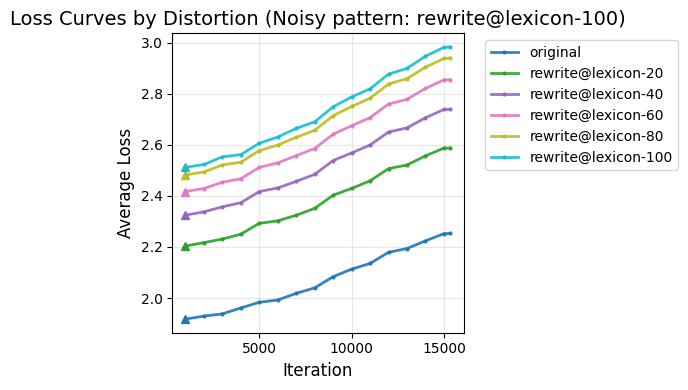

In [37]:
sequence_types = ["original", "rewrite@lexicon-20", "rewrite@lexicon-40", "rewrite@lexicon-60", "rewrite@lexicon-80", "rewrite@lexicon-100"]
fig = plot_multiple_loss_curves_by_distortion(sequence_types, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted rewrite@semantic-20: 16 data points
✓ Plotted rewrite@semantic-40: 16 data points
✓ Plotted rewrite@semantic-60: 16 data points
✓ Plotted rewrite@semantic-80: 16 data points
✓ Plotted rewrite@semantic-100: 16 data points


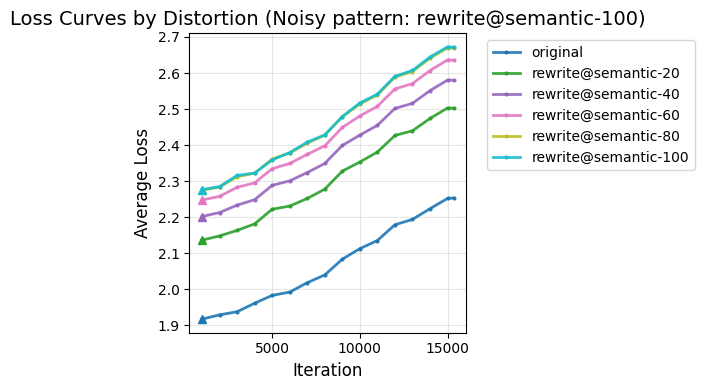

In [38]:
sequence_types = ["original", "rewrite@semantic-20", "rewrite@semantic-40", "rewrite@semantic-60", "rewrite@semantic-80", "rewrite@semantic-100"]
fig = plot_multiple_loss_curves_by_distortion(sequence_types, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted rewrite@wordtrans-20: 16 data points
✓ Plotted rewrite@wordtrans-40: 16 data points
✓ Plotted rewrite@wordtrans-60: 16 data points
✓ Plotted rewrite@wordtrans-80: 16 data points
✓ Plotted rewrite@wordtrans-100: 16 data points


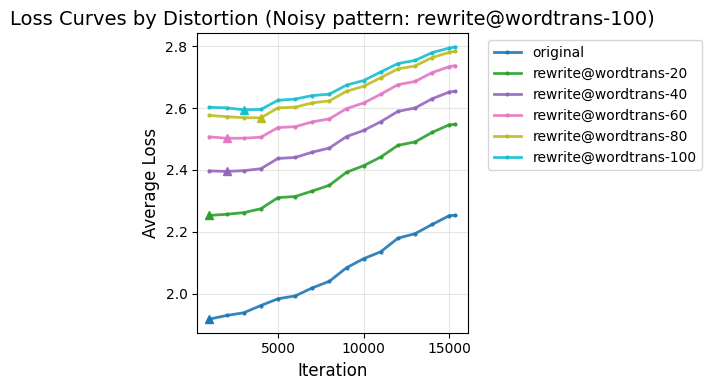

In [39]:
sequence_types = ["original", "rewrite@wordtrans-20", "rewrite@wordtrans-40", "rewrite@wordtrans-60", "rewrite@wordtrans-80", "rewrite@wordtrans-100"]
fig = plot_multiple_loss_curves_by_distortion(sequence_types, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted rewrite@translation-20: 16 data points
✓ Plotted rewrite@translation-40: 16 data points
✓ Plotted rewrite@translation-60: 16 data points
✓ Plotted rewrite@translation-80: 16 data points
✓ Plotted rewrite@translation-100: 16 data points


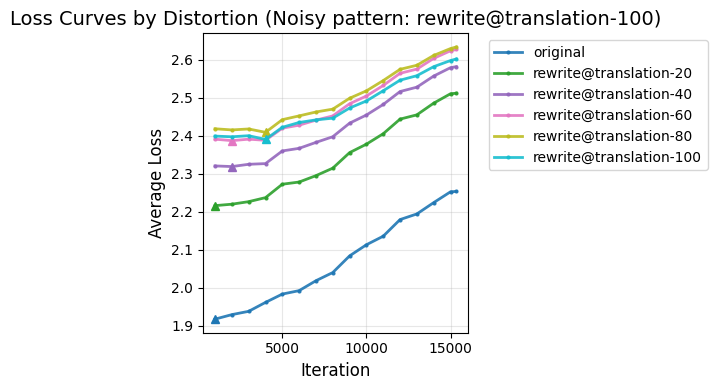

In [40]:
sequence_types = ["original", "rewrite@translation-20", "rewrite@translation-40", "rewrite@translation-60", "rewrite@translation-80", "rewrite@translation-100"]
fig = plot_multiple_loss_curves_by_distortion(sequence_types, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted rewrite@syntax-20: 16 data points
✓ Plotted rewrite@lexicon-20: 16 data points
✓ Plotted rewrite@semantic-20: 16 data points
✓ Plotted rewrite@wordtrans-20: 16 data points
✓ Plotted rewrite@translation-20: 16 data points


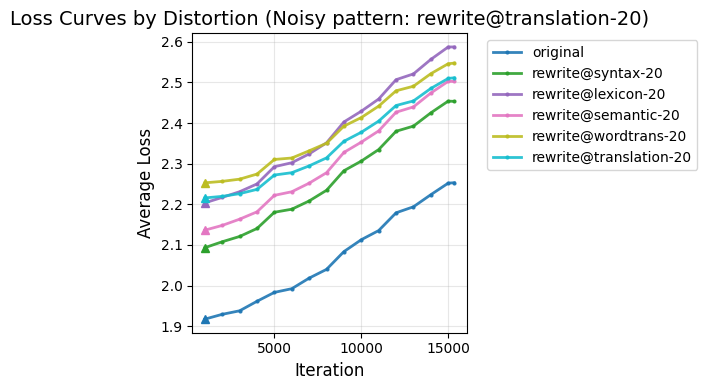

In [41]:
sequence_types = ["original", "rewrite@syntax-20", "rewrite@lexicon-20", "rewrite@semantic-20", "rewrite@wordtrans-20", "rewrite@translation-20"]
fig = plot_multiple_loss_curves_by_distortion(sequence_types, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted rewrite@syntax-40: 16 data points
✓ Plotted rewrite@lexicon-40: 16 data points
✓ Plotted rewrite@semantic-40: 16 data points
✓ Plotted rewrite@wordtrans-40: 16 data points
✓ Plotted rewrite@translation-40: 16 data points


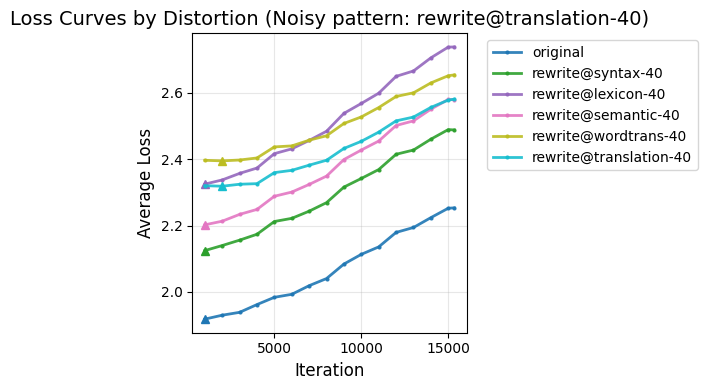

In [42]:
sequence_types = ["original", "rewrite@syntax-40", "rewrite@lexicon-40", "rewrite@semantic-40", "rewrite@wordtrans-40", "rewrite@translation-40"]
fig = plot_multiple_loss_curves_by_distortion(sequence_types, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
✓ Plotted rewrite@syntax-100: 16 data points
✓ Plotted rewrite@lexicon-100: 16 data points
✓ Plotted rewrite@semantic-100: 16 data points
✓ Plotted rewrite@wordtrans-100: 16 data points
✓ Plotted rewrite@translation-100: 16 data points


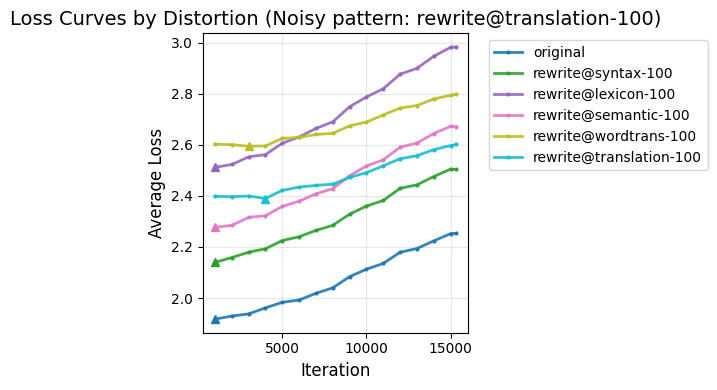

In [43]:
sequence_types = ["original", "rewrite@syntax-100", "rewrite@lexicon-100", "rewrite@semantic-100", "rewrite@wordtrans-100", "rewrite@translation-100"]
fig = plot_multiple_loss_curves_by_distortion(sequence_types, show_noise_rate=False)
plt.show()

✓ Plotted original: 16 data points
⚠️  Error plotting monosyn-21: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_monosyn-21/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting mltlsyn-16: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_mltlsyn-16/llm-jp-3-13b-exp2-multi'
✓ Plotted mask-8: 16 data points
✓ Plotted delete-8: 16 data points
✓ Plotted replace-8: 16 data points


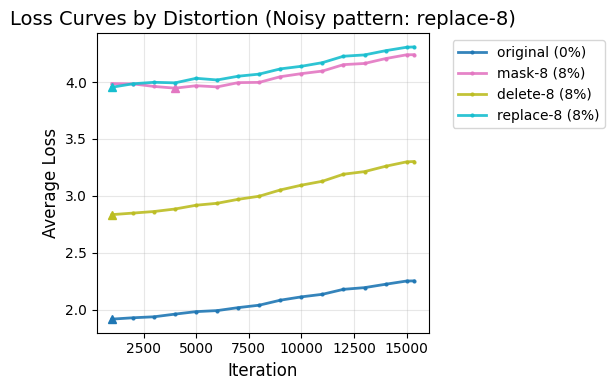

In [44]:
distortions = ["original", "monosyn-21", "mltlsyn-16", "mask-8", "delete-8", "replace-8"]
fig = plot_multiple_loss_curves_by_distortion(distortions, show_noise_rate=True)
plt.show()

✓ Plotted original: 16 data points
⚠️  Error plotting monosyn-44: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_monosyn-44/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting mltlsyn-34: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_mltlsyn-34/llm-jp-3-13b-exp2-multi'
✓ Plotted mask-16: 16 data points
✓ Plotted delete-16: 16 data points
✓ Plotted replace-16: 16 data points


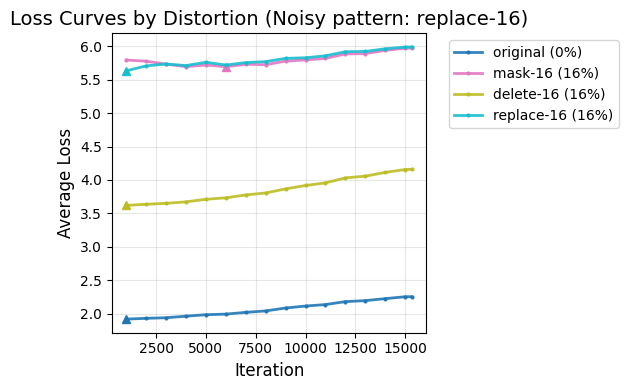

In [45]:
distortions = ["original", "monosyn-44", "mltlsyn-34", "mask-16", "delete-16", "replace-16"]
fig = plot_multiple_loss_curves_by_distortion(distortions, show_noise_rate=True)
plt.show()

✓ Plotted original: 16 data points
⚠️  Error plotting monosyn-94: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_monosyn-94/llm-jp-3-13b-exp2-multi'
⚠️  Error plotting mltlsyn-72: [Errno 2] No such file or directory: '/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/en_jstage_full_mltlsyn-72/llm-jp-3-13b-exp2-multi'
✓ Plotted mask-32: 16 data points
✓ Plotted delete-32: 16 data points
✓ Plotted replace-32: 16 data points


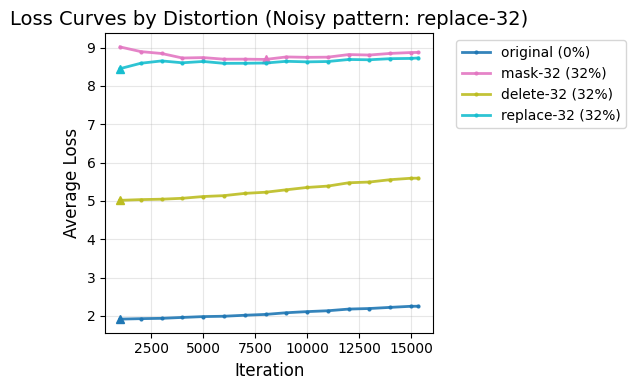

In [46]:
distortions = ["original", "monosyn-94", "mltlsyn-72", "mask-32", "delete-32", "replace-32"]
fig = plot_multiple_loss_curves_by_distortion(distortions, show_noise_rate=True)
plt.show()